In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as ac

In [2]:
eq = ac.get_earthquakes_db()

In [3]:
cont_vars = ac.get_cont_var(eq)

In [4]:
cont_vars

['cdi', 'dmin', 'felt', 'gap', 'mag', 'mmi', 'nst', 'rms', 'tz']

In [5]:
eq.head().T

,0,1,2,3,4
alert,NaN,NaN,NaN,NaN,NaN
cdi,NaN,NaN,4.4,NaN,NaN
code,37389218,37389202,37389194,37389186,73096941
detail,https://earthquake.usgs.gov/fdsnws/event/1/que...,https://earthquake.usgs.gov/fdsnws/event/1/que...,https://earthquake.usgs.gov/fdsnws/event/1/que...,https://earthquake.usgs.gov/fdsnws/event/1/que...,https://earthquake.usgs.gov/fdsnws/event/1/que...
dmin,0.008693,0.02003,0.02137,0.02618,0.07799
felt,NaN,NaN,28.0,NaN,NaN
gap,85.0,79.0,21.0,39.0,192.0
ids,",ci37389218,",",ci37389202,",",ci37389194,",",ci37389186,",",nc73096941,"
mag,1.35,1.29,3.42,0.44,2.16
magType,ml,ml,ml,ml,md


In [6]:
eq.shape

(9332, 26)

In [7]:
eq.sources.unique()

array([',ci,', ',nc,', ',pr,', ',ak,', ',us,', ',ak,us,', ',mb,', ',nn,',
       ',hv,', ',nc,us,', ',pt,at,us,', ',uw,', ',hv,us,', ',av,',
       ',ismpkansas,', ',nm,', ',uu,', ',pr,us,', ',ci,nn,', ',nn,nc,',
       ',ak,av,', ',us,ismpkansas,', ',nn,ci,', ',us,pt,at,', ',mb,us,',
       ',at,ak,us,', ',nc,nn,', ',uw,us,', ',nn,uu,', ',ak,at,us,',
       ',ci,us,', ',se,', ',nn,nc,us,', ',av,ak,', ',nc,at,us,',
       ',nn,us,', ',pt,pr,us,', ',ci,nc,', ',uu,mb,', ',pt,us,pr,',
       ',at,us,pt,', ',us,pt,', ',ismpkansas,us,', ',ci,at,us,',
       ',us,us,', ',nc,ci,', ',us,hv,', ',us,mb,', ',nm,us,', ',us,ld,',
       ',uu,us,', ',us,uu,'], dtype=object)

In [8]:
eq.type.unique()

array(['earthquake', 'quarry blast', 'explosion', 'ice quake',
       'other event'], dtype=object)

In [9]:
eq.type.value_counts()

earthquake      9081
quarry blast      95
explosion         80
ice quake         72
other event        4
Name: type, dtype: int64

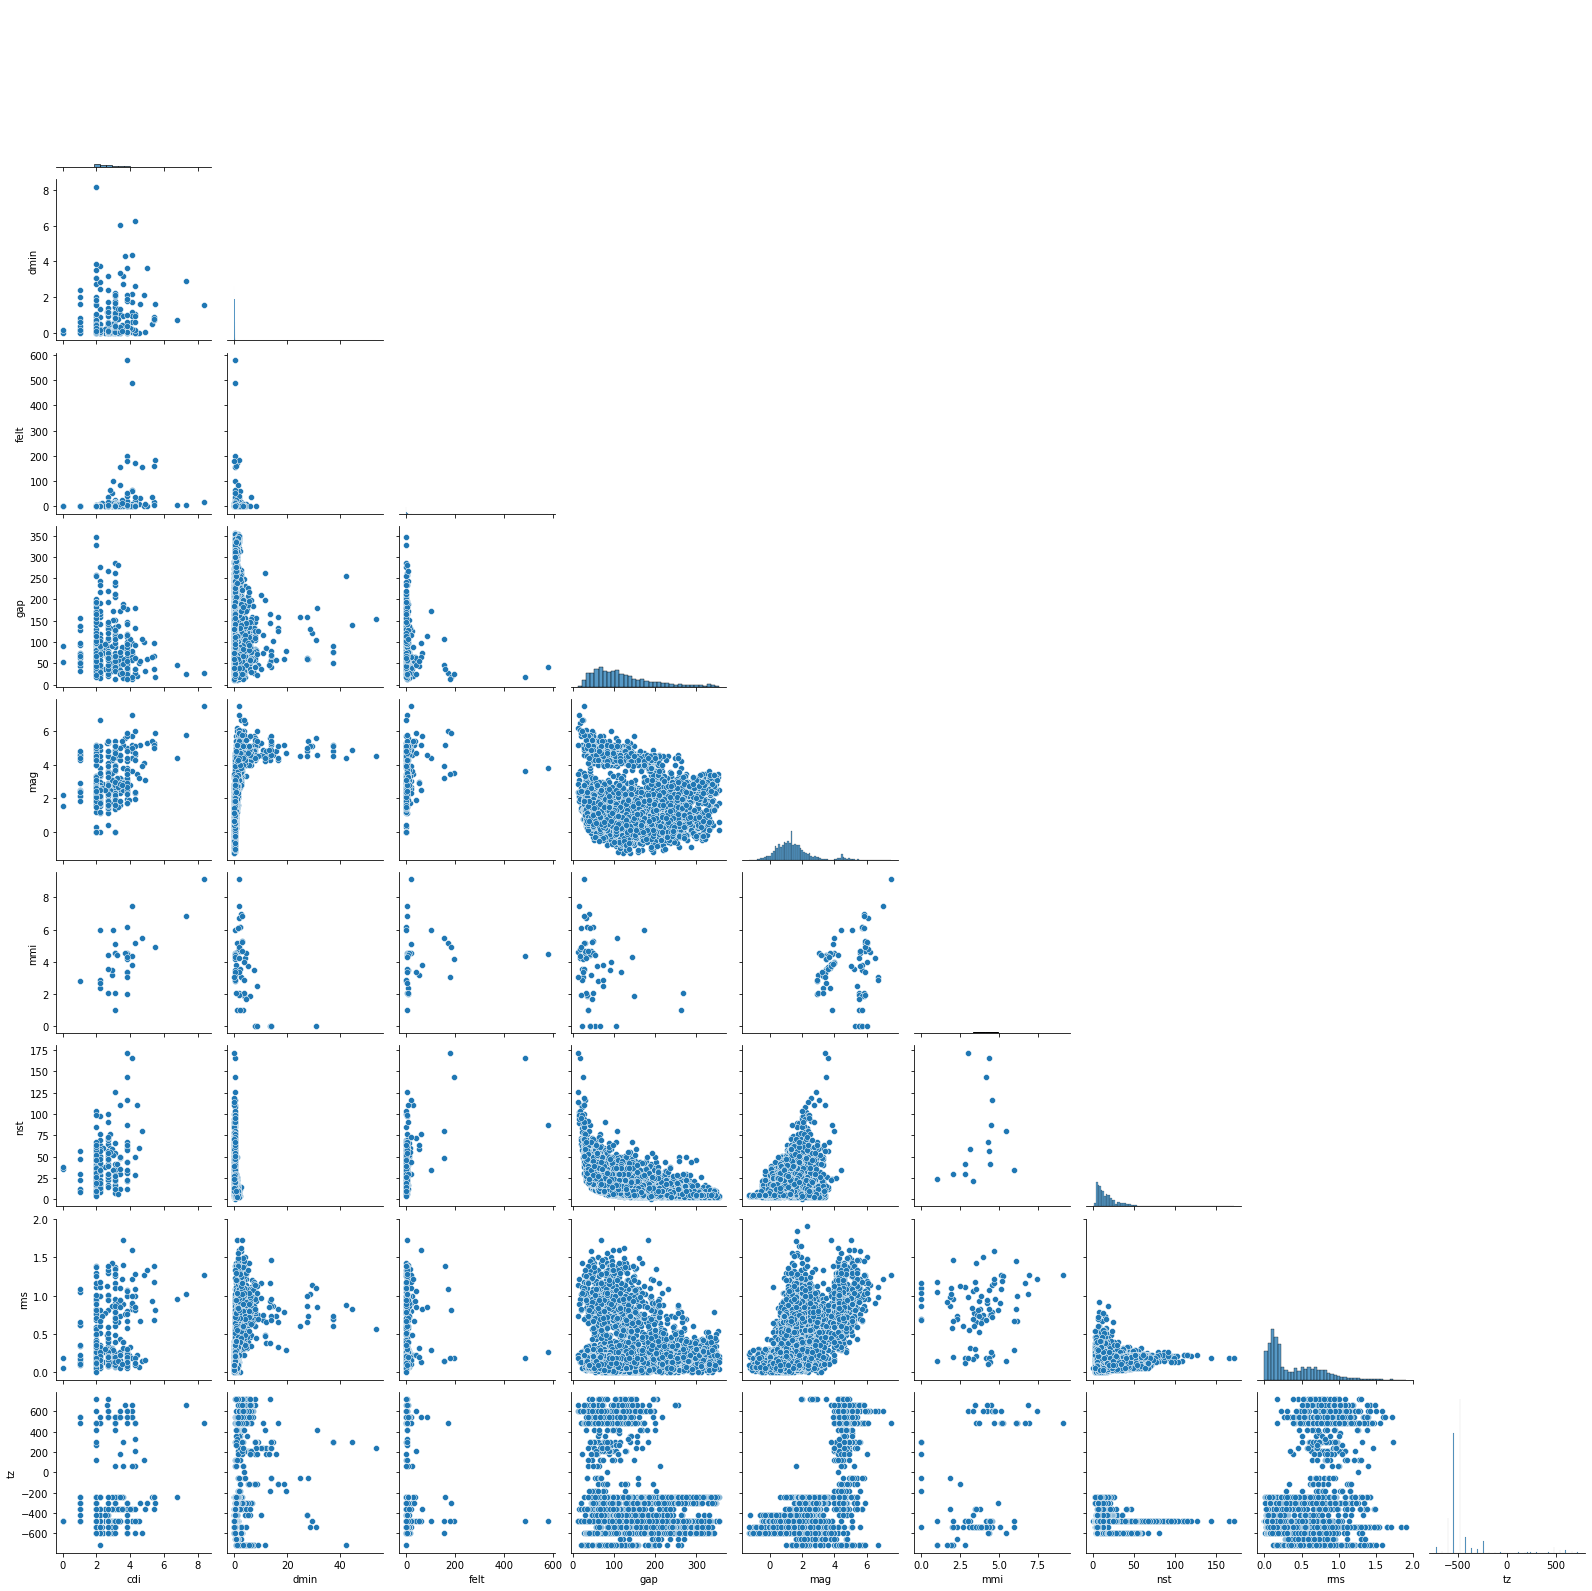

In [23]:
#plt.figure(figsize = (12, 6), facecolor = 'floralwhite')

sns.pairplot(data = eq[cont_vars], dropna=True, corner=True);

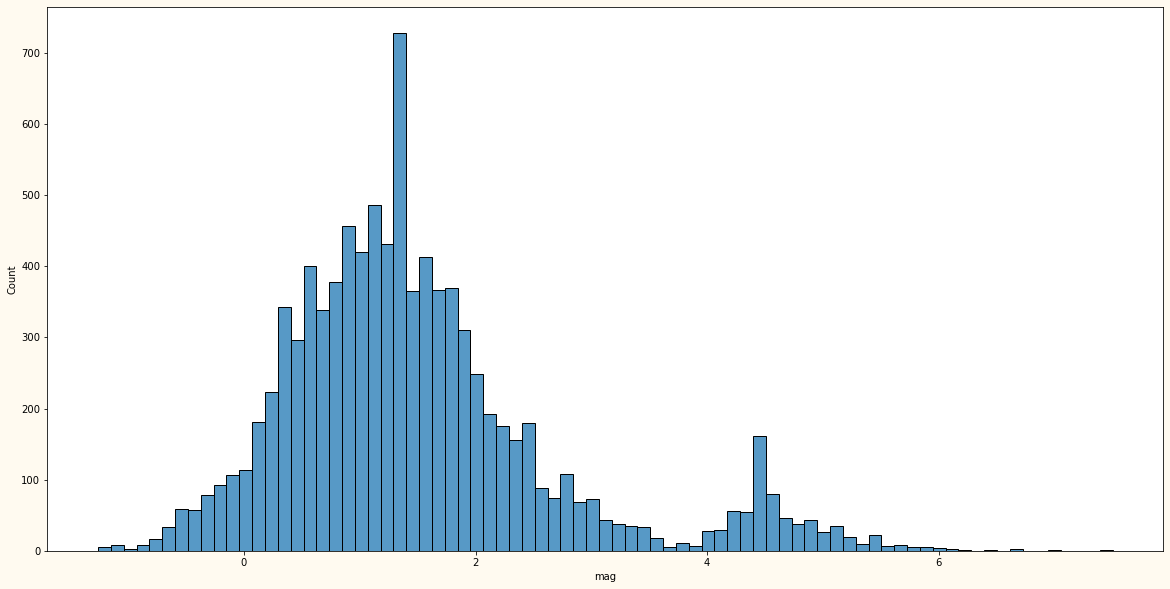

In [31]:
plt.figure(figsize=(20,10), facecolor='floralwhite')

sns.histplot(data=eq, x='mag');

##### Slicing

In [6]:
eq.head(1)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...


In [8]:
# slicing rows from 10 till 14, columns 8 and 9
eq.iloc[10:15, 8:10]

,mag,magType
10,0.50,ml
11,2.77,md
12,0.50,ml
13,4.50,mb
14,2.13,md


In [9]:
# get the value from the row 10 and columns 'mag'
eq.at[10, 'mag']

0.5

In [10]:
# same as above but using numerical indexes 
eq.iat[10, 8]

0.5

*Slicing with `loc` is __inclusive__ with `iloc` -> __[inclusive-exclusive]__*

In [11]:
#slicing with loc is inclusive. iloc is incl-exclusive
eq.iloc[10:15, 8:10].equals(eq.loc[10:14, 'mag':'magType'])

True

In [21]:
# get specific rows (axis=0)
eq.take([10, 12, 15], axis = 0)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
10,NaN,NaN,37389162,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.005116,NaN,57.0,",ci37389162,",0.5,ml,...,",ci,",automatic,1539471831030,"M 0.5 - 10km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539472054436,https://earthquake.usgs.gov/earthquakes/eventp...
12,NaN,NaN,37389146,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.015170,NaN,76.0,",ci37389146,",0.5,ml,...,",ci,",automatic,1539470934710,"M 0.5 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539471147309,https://earthquake.usgs.gov/earthquakes/eventp...
15,NaN,NaN,20280430,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,",ak20280430,",2.0,ml,...,",ak,",automatic,1539470304219,"M 2.0 - 156km WNW of Haines Junction, Canada",0,earthquake,",geoserve,origin,",-480.0,1539473366902,https://earthquake.usgs.gov/earthquakes/eventp...


In [7]:
# get specific columns (axis=1)
eq.take([3, 5, 7], axis=1)

,detail,felt,ids
0,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",ci37389218,"
1,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",ci37389202,"
2,https://earthquake.usgs.gov/fdsnws/event/1/que...,28.0,",ci37389194,"
3,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",ci37389186,"
4,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",nc73096941,"
...,...,...,...
9327,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",nc73086771,"
9328,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",ci38063967,"
9329,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",pr2018261000,"
9330,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,",ci38063959,"


In [10]:
eq.loc[110:112, 'title']

110               M 1.1 - 35km S of Ester, Alaska
111    M 1.9 - 93km WNW of Arctic Village, Alaska
112      M 0.9 - 20km WSW of Smith Valley, Nevada
Name: title, dtype: object

In [15]:
eq.title

0                  M 1.4 - 9km NE of Aguanga, CA
1                  M 1.3 - 9km NE of Aguanga, CA
2                  M 3.4 - 8km NE of Aguanga, CA
3                  M 0.4 - 9km NE of Aguanga, CA
4                  M 2.2 - 10km NW of Avenal, CA
                          ...                   
9327        M 0.6 - 9km ENE of Mammoth Lakes, CA
9328                 M 1.0 - 3km W of Julian, CA
9329    M 2.4 - 35km NNE of Hatillo, Puerto Rico
9330               M 1.1 - 9km NE of Aguanga, CA
9331               M 0.7 - 9km NE of Aguanga, CA
Name: title, Length: 9332, dtype: object

In [16]:
# same result as above
eq.loc[:, 'title']

0                  M 1.4 - 9km NE of Aguanga, CA
1                  M 1.3 - 9km NE of Aguanga, CA
2                  M 3.4 - 8km NE of Aguanga, CA
3                  M 0.4 - 9km NE of Aguanga, CA
4                  M 2.2 - 10km NW of Avenal, CA
                          ...                   
9327        M 0.6 - 9km ENE of Mammoth Lakes, CA
9328                 M 1.0 - 3km W of Julian, CA
9329    M 2.4 - 35km NNE of Hatillo, Puerto Rico
9330               M 1.1 - 9km NE of Aguanga, CA
9331               M 0.7 - 9km NE of Aguanga, CA
Name: title, Length: 9332, dtype: object

### Filtering

In [21]:
eq[eq.mag >=7]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,green,4.1,1000haa3,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,red,8.4,1000h3p4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


*Using `loc` for filtering helps not only select rows with the filtering criteria but select specific columns as well*

In [22]:
eq.loc[
    eq.mag >= 7, 
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [24]:
eq.loc[
    (eq.place.str.contains('Alaska')) & (eq.alert.notnull()),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
1015,green,5.0,ml,"M 5.0 - 61km SSW of Chignik Lake, Alaska",1,earthquake
1273,green,4.0,ml,"M 4.0 - 71km SW of Kaktovik, Alaska",1,earthquake
1795,green,4.0,ml,"M 4.0 - 60km WNW of Valdez, Alaska",1,earthquake
2752,green,4.0,ml,"M 4.0 - 67km SSW of Kaktovik, Alaska",1,earthquake
3260,green,3.9,ml,"M 3.9 - 44km N of North Nenana, Alaska",0,earthquake
4101,green,4.2,ml,"M 4.2 - 131km NNW of Arctic Village, Alaska",0,earthquake
6897,green,3.8,ml,"M 3.8 - 80km SSW of Kaktovik, Alaska",0,earthquake
8524,green,3.8,ml,"M 3.8 - 69km SSW of Kaktovik, Alaska",0,earthquake
9133,green,5.1,ml,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,earthquake


`between` -> **greater than or equal** and **less than or equal**

In [33]:
# the filter includes both values 6.5 and 7.5 and everything in between
eq.loc[
    eq.mag.between(6.5, 7.5),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
118,green,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
799,green,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
4363,green,6.7,mww,"M 6.7 - 263km NNE of Ndoi Island, Fiji",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


`isin()` -> match one of the list of values

In [34]:
eq.loc[
    eq.alert.isin(['orange', 'red']),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [37]:
# filter by min and max indexes
eq.loc[
    [eq.mag.idxmin(), eq.mag.idxmax()],
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
2409,NaN,-1.26,ml,"M -1.3 - 41km ENE of Adak, Alaska",0,earthquake
5263,red,7.50,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


**`filter`** -> filter columns by passing arguments

**`items`**

In [47]:
eq.filter(items=['mag', 'magType']).head(1)

,mag,magType
0,1.35,ml


**`like`**

In [46]:
eq.filter(like='mag').head(1)

,mag,magType
0,1.35,ml


**`regex`**

In [45]:
# all columns that start with t
eq.filter(regex=r'^t').head(1)

,time,title,tsunami,type,types,tz
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0


**`filter` rows by setting `axis=0` filters by index only!!!**

In [51]:
eq.set_index('place').filter(like='Japan', axis=0).filter(like='mag').head()

,mag,magType
place,,
"160km NNW of Nago, Japan",4.6,mb
"7km ESE of Asahi, Japan",5.2,mww
"14km E of Tomakomai, Japan",4.5,mwr
"139km WSW of Naze, Japan",4.7,mb
"53km ESE of Kamaishi, Japan",4.6,mb


`filter` with `pd.Series`

In [54]:
eq.set_index('place').title.filter(like='Japan').head()

place
160km NNW of Nago, Japan          M 4.6 - 160km NNW of Nago, Japan
7km ESE of Asahi, Japan            M 5.2 - 7km ESE of Asahi, Japan
14km E of Tomakomai, Japan      M 4.5 - 14km E of Tomakomai, Japan
139km WSW of Naze, Japan          M 4.7 - 139km WSW of Naze, Japan
53km ESE of Kamaishi, Japan    M 4.6 - 53km ESE of Kamaishi, Japan
Name: title, dtype: object

## Regular Expressions

Pandas lets us use regular expressions direcly without importing `re` library. More about regex [here](https:////regex101.com)

**$ -> ends with**
`r'CA|California$'` end either with CA or California

In [38]:
eq.loc[
    eq.place.str.contains(r'California|CA$'),
    ['alert', 'mag', 'magType', 'place', 'tsunami', 'type']
].head(2)

,alert,mag,magType,place,tsunami,type
0,NaN,1.35,ml,"9km NE of Aguanga, CA",0,earthquake
1,NaN,1.29,ml,"9km NE of Aguanga, CA",0,earthquake


**^ -> starts with**

In [44]:
eq.filter(regex=r'^t').head(1)

,time,title,tsunami,type,types,tz
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0


In [55]:
df = eq.loc[:, ['time', 'title', 'place', 'magType', 'mag', 'alert', 'tsunami']].copy()

In [56]:
df.head(1)

,time,title,place,magType,mag,alert,tsunami
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.35,NaN,0


In [78]:
df.place.str.extract(r', (.*$)')[0].sort_values().unique() # extract everything after ',' till the end of the string

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Australia', 'Azerbaijan', 'B.C., MX', 'Barbuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba ', 'British Virgin Islands',
       'Burma', 'CA', 'California', 'Canada', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Ecuador region',
       'El Salvador', 'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala',
       'Haiti', 'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kansas',
       'Kentucky', 'Kyrgyzstan', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Missouri', 'Montana', 'NV', 'Nevada', 'New Caledonia',
       'New Hampshire', 'New Mexico', 'New Zealand', 'Nicaragua',
       'North Carolina', 'Northern Mariana Islands', 'Oklahoma', 'Oregon',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines',
       'Puerto Rico', 'Roman

In [72]:
type(df.place.str.extract(r', (.*$)'))

pandas.core.frame.DataFrame

In [73]:
type(df.place.str.extract(r', (.*$)'))

pandas.core.frame.DataFrame

In [76]:
df.place.str.extract(r', (.*$)') # DataFrame

,0
0,CA
1,CA
2,CA
3,CA
4,CA
...,...
9327,CA
9328,CA
9329,Puerto Rico
9330,CA


In [87]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
df.place.str.extract(r', (.*$)')[0] # Series

0                CA
1                CA
2                CA
3                CA
4                CA
           ...     
9327             CA
9328             CA
9329    Puerto Rico
9330             CA
9331             CA
Name: 0, Length: 9332, dtype: object

In [88]:
df['parsed_place'] = df.place.str.replace(
    r'.* of ', '' # remove anything saying <something> of <something>
).str.replace(
    r'the ', '' # remove things starting with "the"
).str.replace(
    r'CA$', 'California' # fix California
).str.replace(
    r'NV$', 'Nevada' # fix Nevada
).str.replace(
    r'MX$', 'Mexico' # fix Mexico
).str.replace(
    r' region$', '' # chop off endings with "region"
).str.replace(
    r'northern ', '' # remove "northern"
).str.replace(
    r'Fiji Islands', 'Fiji' # line up the Fiji places
).str.replace(
    r'^.*, ', '' # remove anything else extraneous from the beginning
).str.strip() # remove any extra spaces

In [84]:
df.parsed_place.sort_values().unique() # extract everything after ',' till the end of the string

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Ascension Island', 'Australia', 'Azerbaijan', 'Balleny Islands',
       'Barbuda', 'Bolivia', 'British Virgin Islands', 'Burma',
       'California', 'Canada', 'Carlsberg Ridge',
       'Central East Pacific Rise', 'Central Mid-Atlantic Ridge', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'El Salvador',
       'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Haiti',
       'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indian Ocean Triple Junction', 'Indonesia', 'Iran', 'Iraq',
       'Italy', 'Jamaica', 'Japan', 'Kansas', 'Kentucky',
       'Kermadec Islands', 'Kuril Islands', 'Kyrgyzstan', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Mid-Indian Ridge', 'Missouri',
       'Montana', 'Nevada', 'New Caledonia', 'New Hampshire',
       'New Mexico', 'New Zealand', 'Nicaragua', 'North Carolina',


#### Create multiple columns with `assign`

In [94]:
df = df.assign(
    in_ca=df.parsed_place.str.endswith('California'),
    in_alaska=df.parsed_place.str.endswith('Alaska')
)

In [95]:
df.head()

,time,title,place,magType,mag,alert,tsunami,parsed_place,in_ca,in_alaska
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.35,NaN,0,California,True,False
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.29,NaN,0,California,True,False
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA","8km NE of Aguanga, CA",ml,3.42,NaN,0,California,True,False
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,0.44,NaN,0,California,True,False
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA","10km NW of Avenal, CA",md,2.16,NaN,0,California,True,False


#### Delete

In [98]:
try:
    del df['in_alaska']
    del df['in_ca']
except KeyError:
    # handle the error here
    print('not there anymore')

In [99]:
df.head()

,time,title,place,magType,mag,alert,tsunami,parsed_place
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.35,NaN,0,California
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.29,NaN,0,California
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA","8km NE of Aguanga, CA",ml,3.42,NaN,0,California
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,0.44,NaN,0,California
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA","10km NW of Avenal, CA",md,2.16,NaN,0,California


In [100]:
df = df.assign(
    in_ca=df.parsed_place.str.endswith('California'),
    in_alaska=df.parsed_place.str.endswith('Alaska')
)

In [102]:
df.head(1)

,time,title,place,magType,mag,alert,tsunami,parsed_place,in_ca,in_alaska
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.35,NaN,0,California,True,False


In [103]:
in_ca = df.pop('in_ca')
df.columns

Index(['time', 'title', 'place', 'magType', 'mag', 'alert', 'tsunami',
       'parsed_place', 'in_alaska'],
      dtype='object')

In [105]:
in_ca.head()

0    True
1    True
2    True
3    True
4    True
Name: in_ca, dtype: bool

In [106]:
# use in_ca as a mask
df[in_ca].head()

,time,title,place,magType,mag,alert,tsunami,parsed_place,in_alaska
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.35,NaN,0,California,False
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,1.29,NaN,0,California,False
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA","8km NE of Aguanga, CA",ml,3.42,NaN,0,California,False
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,0.44,NaN,0,California,False
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA","10km NW of Avenal, CA",md,2.16,NaN,0,California,False


In [107]:
df.drop([0, 1]).head(2)

,time,title,place,magType,mag,alert,tsunami,parsed_place,in_alaska
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA","8km NE of Aguanga, CA",ml,3.42,NaN,0,California,False
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA","9km NE of Aguanga, CA",ml,0.44,NaN,0,California,False


In [108]:
df.drop(
    columns=[col for col in df.columns \
             if col not in \
             ['alert', 'mag', 'title', 'time', 'tsunami']]
).head()

,time,title,mag,alert,tsunami
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",1.35,NaN,0
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",1.29,NaN,0
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",3.42,NaN,0
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0.44,NaN,0
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA",2.16,NaN,0


In [109]:
# or use axis=1
df.drop(
    [col for col in df.columns \
     if col not in ['alert', 'mag', 'title', 'time', 'tsunami']],
    axis=1
)

,time,title,mag,alert,tsunami
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",1.35,NaN,0
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",1.29,NaN,0
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",3.42,NaN,0
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0.44,NaN,0
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA",2.16,NaN,0
...,...,...,...,...,...
9327,1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.62,NaN,0
9328,1537230135130,"M 1.0 - 3km W of Julian, CA",1.00,NaN,0
9329,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",2.40,NaN,0
9330,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",1.10,NaN,0
